In [1]:
from ml_recon.pl_modules.pl_varnet import pl_VarNet
import torch
import matplotlib.pyplot as plt

In [18]:
model = pl_VarNet.load_from_checkpoint("/home/brenden/Documents/code/python/mri_machine_learning_reconstruction/artifacts/model-eavr9y1o:v0/model.ckpt")
sc_model = pl_VarNet.load_from_checkpoint("artifacts/model-qz37jqqx:v0/model.ckpt")

No image space loss!!
No image space loss!!


In [3]:
Unets = model.model

In [4]:
parameters = [pram for pram in Unets.cascades[0].model.down_sample_layers[0].layers[0].parameters()]

In [5]:
parameters[0].shape

torch.Size([32, 6, 3, 3])

In [6]:
parameters = parameters[0].cpu()

In [ ]:
output_channels = parameters.shape[0]
input_channels = parameters.shape[1]

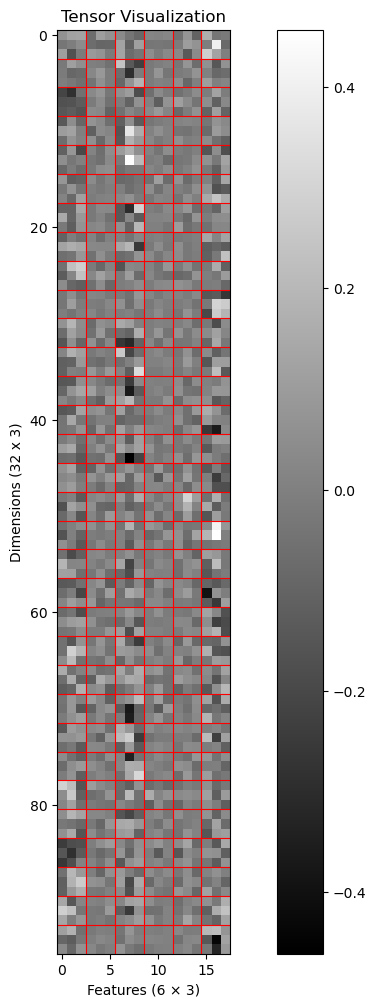

In [ ]:
def plot_conv_weights(param):
    reshaped = param.permute(0, 2, 1, 3)


    image = reshaped.reshape(output_channels*3, input_channels*3)
# Convert to numpy for plotting
    image = image.detach().numpy()

# Plot the image
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(image, cmap="gray")
    ax.set_xlabel("Features (6 × 3)")
    ax.set_ylabel("Dimensions (32 x 3)")
    ax.set_title("Tensor Visualization")

# Add grid lines to delineate kernels
    rows, cols = param.shape[:2]  # [32, 6]
    kernel_size = param.shape[2]  # 3x3 → 3

# Horizontal lines (between rows)
    for i in range(1, rows):
        ax.axhline(i * kernel_size - 0.5, color='red', linewidth=0.8)

# Vertical lines (between columns)
    for j in range(1, cols):
        ax.axvline(j * kernel_size - 0.5, color='red', linewidth=0.8)

    plt.colorbar(ax.imshow(image, cmap="gray"))
    plt.show()
